# Laboratorio IA: DeepLearning - MLP
### Desafio 1: 0.01

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [4]:
# Configuración para mostrar gráficos en Jupyter Notebook
%matplotlib inline

In [5]:
# Cargar el conjunto de datos Iris
data = load_iris()
X = data.data
y = data.target

In [6]:
# Convertir las etiquetas a formato one-hot encoding
y = to_categorical(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Contruccion del modelo MLP

In [8]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [9]:
# Crear el modelo MLP con Dropout
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dropout(0.5))  # Dropout con tasa del 50%
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

C:\Users\matix\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Crear el modelo MLP con Dropout + Regularización L2
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu', kernel_regularizer=l2(0.01)))  # Regularización L2 en la capa de entrada
model.add(Dropout(0.5))  # Dropout con tasa del 50%
model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))  # Regularización L2 en la capa oculta
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))  # Regularización L2 en la capa oculta
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # Capa de salida

In [11]:
# Resumen del modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303 (1.18 KB)

 Trainable params: 303 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

### Compilación del Modelo

In [13]:
# Compilar el modelo
optimizer = Adam(learning_rate=0.01) #Optimizacion 0.01
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### Entrenamiento del modelo

In [15]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3695 - loss: 1.8402 - val_accuracy: 0.3333 - val_loss: 1.2412
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3090 - loss: 1.3368 - val_accuracy: 0.5833 - val_loss: 1.1993
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3102 - loss: 1.1929 - val_accuracy: 0.5833 - val_loss: 1.1005
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3598 - loss: 1.2050 - val_accuracy: 0.5833 - val_loss: 1.1100
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4701 - loss: 1.0987 - val_accuracy: 0.5833 - val_loss: 1.0738
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4032 - loss: 1.1059 - val_accuracy: 0.5833 - val_loss: 0.9536
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5592 - loss: 1.0173 - val_accuracy: 0.5833 - val_loss: 0.8163
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5283 - loss: 0.9551 - val_accuracy: 0.5833 - val_loss:

### Evaluacion del modelo

In [17]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9333 - loss: 0.4992
Precisión en el conjunto de prueba: 93.33%


In [18]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9333 - loss: 0.4992
Precisión en el conjunto de prueba: 93.33%


### Guardar y cargar el modelo

In [20]:
# Guardar el modelo
model.save('mlp_model_dropout.h5')

# Cargar el modelo
from tensorflow.keras.models import load_model
model = load_model('mlp_model_dropout.h5')

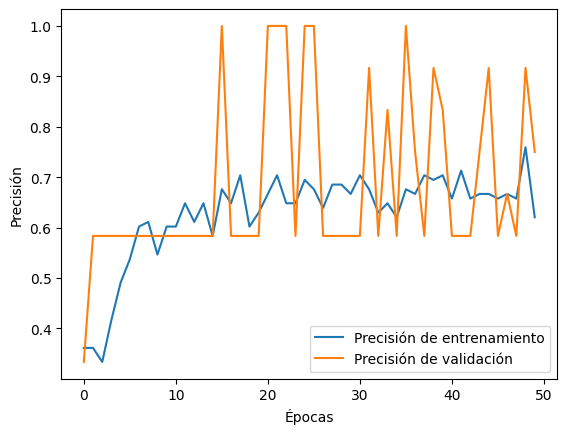

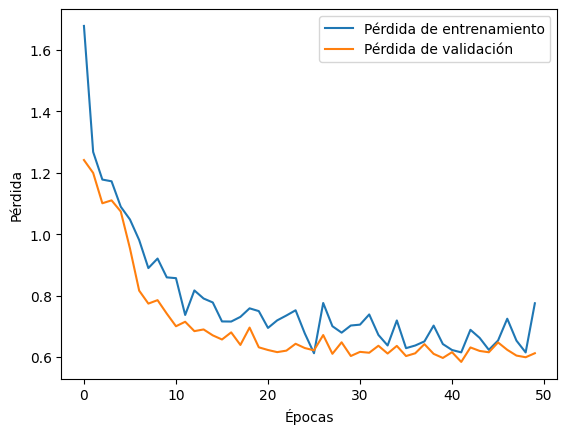

In [21]:
# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


## -¿Cómo afecta cada cambio en la tasa de aprendizaje a la precisión y la pérdida del modelo durante el entrenamiento y la validación?

#### En este caso(0.01) provoca inestabilidad en el entrenamiento con fluctuaciones en precisión y pérdida. Aunque el modelo aprende y ajusta rápidamente, esto produce a una generalización pobre, como se ve en la alta variabilidad de la precisión de validación.